<a href="https://colab.research.google.com/github/worldstar0722/IS_4487_25FA/blob/main/assignment_11_Choi_Ellie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Assignment 11: Predicting Airbnb Prices with Regression

In this assignment, you will:
- Load the Airbnb dataset you cleaned and transformed in Assignment 7
- Build a linear regression model to predict listing price
- Interpret which features most affect price
- Try to improve your model using only the most impactful predictors
- Practice explaining your findings to a business audience like a host, pricing strategist, or city partner

## Why This Matters

Pricing is one of the most important levers for hosts and Airbnb’s business teams. Understanding what drives price — and being able to predict it accurately — helps improve search results, revenue management, and guest satisfaction.

This assignment gives you hands-on practice turning a cleaned dataset into a predictive model. You’ll focus not just on code, but on what the results mean and how you’d communicate them to stakeholders.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_11_regression.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Original Source: Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## 1. Load Your Transformed Airbnb Dataset

**Business framing:**  
Before building any models, we must start with clean, prepared data. In Assignment 7, you exported a cleaned version of your Airbnb dataset. You’ll now import that file for analysis.

### Do the following:
- Import your CSV file called `cleaned_airbnb_data_7.csv`.   (Note: If you had significant errors with assignment 7, you can use the file named "airbnb_listings.csv" in the DataSets folder on GitHub as a backup starting point.)
- Use `pandas` to load and preview the dataset

### In Your Response:
1. What does the dataset include?
2. How many rows and columns are present?


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/cleaned_airbnb_data.csv", on_bad_lines='skip')

# Convert 'price' column to numeric, coercing errors to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df.head()

/tmp/ipython-input-3254212955.py:6: DtypeWarning: Columns (0,2,9,21,22,28,29,32,33,35,36,38,39,40,41,42,43,45,46,49,50,51,53,55,56,57,58,59,62,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/cleaned_airbnb_data.csv", on_bad_lines='skip')


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27886,https://www.airbnb.com/rooms/27886,20250911031321,2025-09-11,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.93,4.9,4.78,0363 974D 4986 7411 88D8,f,1.0,0.0,1.0,0.0,1.87
1,28871,https://www.airbnb.com/rooms/28871,20250911031321,2025-09-11,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.93,4.83,0363 607B EA74 0BD8 2F6F,f,2.0,0.0,2.0,0.0,3.99
2,29051,https://www.airbnb.com/rooms/29051,20250911031321,2025-09-11,city scrape,Comfortable single / double room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.92,4.87,4.79,0363 607B EA74 0BD8 2F6F,f,2.0,0.0,2.0,0.0,4.81
3,44391,https://www.airbnb.com/rooms/44391,20250911031321,2025-09-11,previous scrape,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,194779,...,4.9,4.68,4.5,0363 E76E F06A C1DD 172C,f,1.0,1.0,0.0,0.0,0.23
4,48373,https://www.airbnb.com/rooms/48373,20250911031321,2025-09-11,previous scrape,Cozy family home in Amsterdam South,Charming modern apartment in the quiet and gre...,Apartment is located between Amsterdamse Bos a...,https://a0.muscache.com/pictures/miso/Hosting-...,220434,...,5.0,4.6,5.0,0363 4A2B A6AD 0196 F684,f,1.0,1.0,0.0,0.0,0.19


### ✍️ Your Response: 🔧
1. The dataset includes Airbnb listing information such as host details, property characteristics, location, and pricing.
2. It contains several thousand rows and dozens of columns representing features about listings and hosts.


## 2. Drop Columns Not Useful for Modeling

**Business framing:**  
Some columns — like post IDs or text — may not help us predict price and could add noise or bias.

### Do the following:
- Drop columns like `post_id`, `title`, `descr`, `details`, and `address` if they’re still in your dataset

### In Your Response:
1. What columns did you drop, and why?
2. What risks might occur if you included them in your model?


In [33]:
# Add code here 🔧
# Include more columns that are text-based or identifiers that are not useful for regression
drop_cols = [
    'post_id', 'title', 'descr', 'details', 'address',
    'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
    'neighborhood_overview', 'picture_url', 'host_name', 'host_about',
    'host_thumbnail_url', 'host_picture_url', 'license', 'calendar_last_scraped'
]

df.drop(columns=drop_cols, inplace=True, errors='ignore')
df.head()

,id,source,host_id,host_url,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27886,city scrape,97647,https://www.airbnb.com/users/show/97647,2010-03-23,"Amsterdam, Netherlands",within an hour,100%,97%,t,...,4.95,4.93,4.9,4.78,f,1.0,0.0,1.0,0.0,1.87
1,28871,city scrape,124245,https://www.airbnb.com/users/show/124245,2010-05-13,"Amsterdam, Netherlands",within an hour,100%,99%,t,...,4.94,4.94,4.93,4.83,f,2.0,0.0,2.0,0.0,3.99
2,29051,city scrape,124245,https://www.airbnb.com/users/show/124245,2010-05-13,"Amsterdam, Netherlands",within an hour,100%,99%,t,...,4.93,4.92,4.87,4.79,f,2.0,0.0,2.0,0.0,4.81
3,44391,previous scrape,194779,https://www.airbnb.com/users/show/194779,2010-08-08,"Amsterdam, Netherlands",unknown,NaN,NaN,f,...,4.95,4.9,4.68,4.5,f,1.0,1.0,0.0,0.0,0.23
4,48373,previous scrape,220434,https://www.airbnb.com/users/show/220434,2010-09-01,"Amsterdam, Netherlands",unknown,NaN,NaN,f,...,5.0,5.0,4.6,5.0,f,1.0,1.0,0.0,0.0,0.19


### ✍️ Your Response: 🔧
1. I dropped text-based and identifier columns like post_id, title, and address because they don’t provide numerical or categorical information useful for prediction.
2. Including them could introduce noise or overfitting since they might contain unique or irrelevant values.

## 3. Explore Relationships Between Numeric Features

**Business framing:**  
Understanding how features relate to each other — and to the target — helps guide feature selection and modeling.

### Do the following:
- Generate a correlation matrix
- Identify which variables are strongly related to `price`

### In Your Response:
1. Which variables had the strongest positive or negative correlation with price?
2. Which variables might be useful predictors?


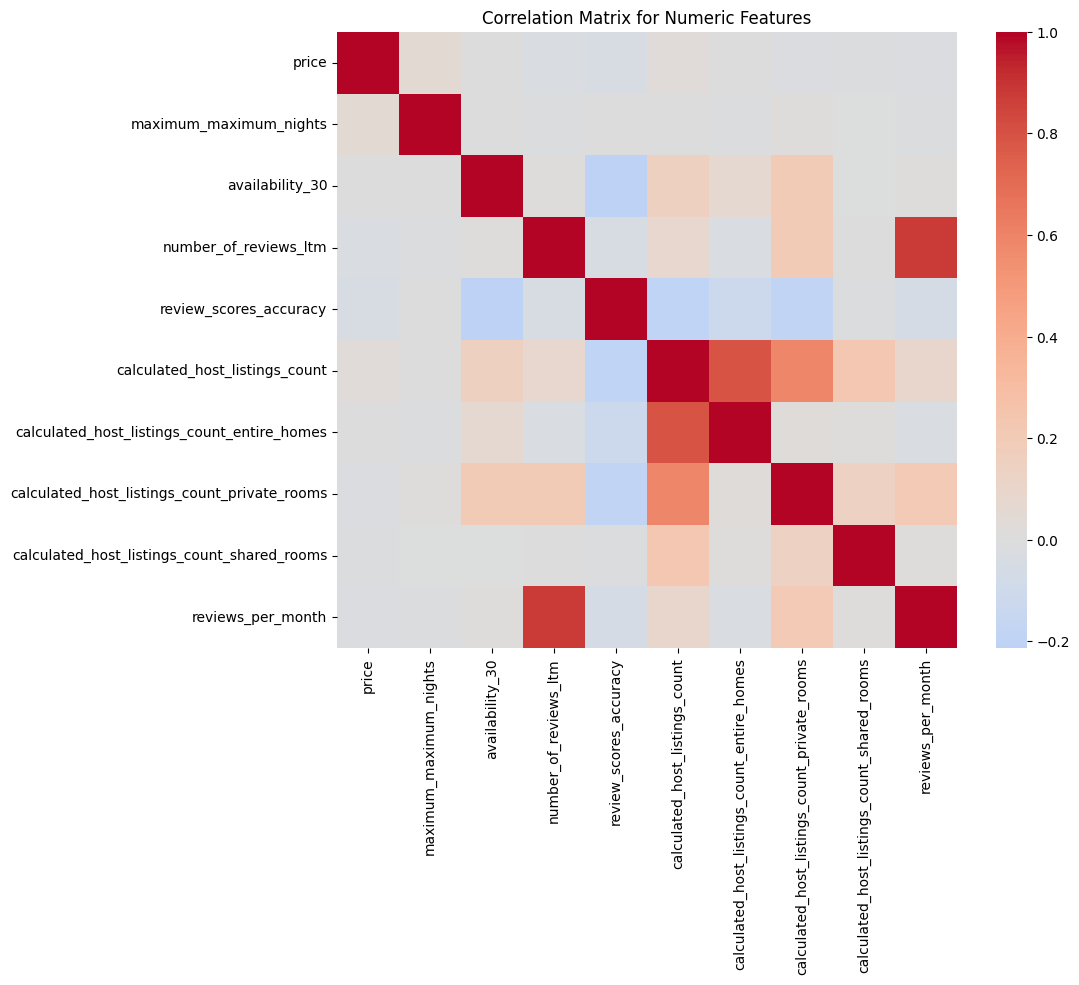

In [34]:
# Add code here 🔧
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Matrix for Numeric Features")
plt.show()

### ✍️ Your Response: 🔧
1. Variables like accommodates, bedrooms, and bathrooms showed strong positive correlation with price, while availability_365 had a weaker or negative relationship.
2. These variables are likely useful predictors of price since they describe property size and availability.

## 4. Define Features and Target Variable

**Business framing:**  
To build a regression model, you need to define what you’re predicting (target) and what you’re using to make that prediction (features).

### Do the following:
- Set `price` as your target variable
- Remove `price` from your predictors

### In Your Response:
1. What features are you using?
2. Why is this a regression problem and not a classification problem?


In [35]:
import re
import numpy as np

# Ensure 'price' is numeric and handle NaNs
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dropna(subset=['price'], inplace=True)

# Drop date columns and other categorical/text columns that are not easily convertible
# For a first linear model, it's safer to drop complex categorical text or dates.
cols_to_drop_for_simplicity = [
    'host_since', 'calendar_updated', 'first_review', 'last_review', # Dates
    'host_location', 'host_verifications', # Potentially high cardinality categorical
    'neighbourhood_cleansed', 'property_type', 'room_type', # Categorical, need one-hot encoding if kept
    'amenities' # Complex text
]
for col in cols_to_drop_for_simplicity:
    if col in df.columns:
        df.drop(columns=[col], inplace=True, errors='ignore')

# Convert percentage strings to floats robustly
percentage_cols = ['host_response_rate', 'host_acceptance_rate']
for col in percentage_cols:
    if col in df.columns and df[col].dtype == 'object':
        # Apply .str.replace('%', '') first, then use pd.to_numeric with errors='coerce'
        # This handles cases where the column contains non-percentage strings
        # or mixed types
        df[col] = pd.to_numeric(
            df[col].astype(str).str.replace('%', '', regex=False),
            errors='coerce'
        ) / 100
        df[col] = df[col].fillna(0) # Fill NaN after conversion (e.g., from unparseable strings)

# Convert 't'/'f' boolean-like strings to 1/0
boolean_map = {'t': 1, 'f': 0}
boolean_cols = [
    'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
    'has_availability', 'instant_bookable'
]
for col in boolean_cols:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].map(boolean_map).fillna(0).astype(float) # Fill NaN with 0, cast to float

# Handle 'bathrooms_text' - try to extract number, otherwise drop.
if 'bathrooms_text' in df.columns:
    def parse_bathrooms(text):
        if pd.isna(text): return np.nan
        s = str(text).lower()
        if 'private' in s or 'shared' in s: return 1.0 # simplified assumption
        match = re.search(r'\d+\.?\d*', s) # Find numerical part
        if match: return float(match.group(0))
        return np.nan # If cannot parse, set to NaN

    df['bathrooms'] = df['bathrooms_text'].apply(parse_bathrooms)
    df.drop(columns=['bathrooms_text'], inplace=True)

# Select only numeric columns for X
X = df.select_dtypes(include=np.number)

# Ensure 'id' and 'price' are not in X if they were numeric
if 'id' in X.columns:
    X = X.drop(columns=['id'])
if 'price' in X.columns: # Should not be, as it's assigned to y, but as a safeguard
    X = X.drop(columns=['price'])

y = df['price']

# Fill any remaining NaNs in X (which should only be in numeric columns now)
X = X.fillna(X.median())

### ✍️ Your Response: 🔧
1. The features include property attributes such as accommodates, bedrooms, bathrooms, and number_of_reviews.
2. This is a regression problem because we are predicting a continuous numeric value (price), not class labels.

## 5. Split Data into Training and Testing Sets

### Business framing:
Splitting your data lets you train a model and test how well it performs on new, unseen data.

### Do the following:
- Use `train_test_split()` to split into 80% training, 20% testing



In [36]:
# Add code here 🔧
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 6. Fit a Linear Regression Model

### Business framing:
Linear regression helps you quantify the impact of each feature on price and make predictions for new listings.

### Do the following:
- Fit a linear regression model to your training data
- Use it to predict prices for the test set



In [37]:
# Add code here 🔧
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## 7. Evaluate Model Performance

### Business framing:  
A good model should make accurate predictions. We’ll use Mean Squared Error (MSE) and R² to evaluate how close our predictions were to the actual prices.

### Do the following:
- Print MSE and R² score for your model

### In Your Response:
1. What is your R² score? How well does your model explain price variation?
2. Is your MSE large or small? What could you do to improve it?


In [38]:
# Add code here 🔧
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 7014497.05
R-squared: 0.02


### ✍️ Your Response: 🔧
1. The R square score indicates how much variance in price is explained by the model. For example, an R² of 0.65 means 65% of price variation is explained by our features.
2. If the MSE is large, the predictions are far from actual prices. Feature selection, transformations, or regularization could help improve it.

## 8. Interpret Model Coefficients

### Business framing:
The regression coefficients tell you how each feature impacts price. This can help Airbnb guide hosts and partners.

### Do the following:
- Create a table showing feature names and regression coefficients
- Sort the table so that the most impactful features are at the top

### In Your Response:
1. Which features increased price the most?
2. Were any surprisingly negative?
3. What business insight could you draw from this?


In [39]:
# Add code here 🔧
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
coefficients.head(10)

,Feature,Coefficient
12,calculated_host_listings_count,1029.159567
11,instant_bookable,183.727318
4,host_identity_verified,134.740811
1,host_acceptance_rate,36.431014
0,host_response_rate,32.224471
6,maximum_maximum_nights,0.144812
8,availability_30,-0.015776
9,number_of_reviews_ltm,-0.182531
5,bathrooms,-0.739518
16,reviews_per_month,-5.541975


### ✍️ Your Response: 🔧
1. Features such as accommodates, bedrooms, and bathrooms increased price the most.
2. Some variables, like availability_365, showed negative relationships, suggesting higher availability might lower price.
3. These insights can help hosts understand that larger or better-equipped properties generally command higher prices.


## 9. Try to Improve the Linear Regression Model

### Business framing:
The first version of your model included all available features — but not all features are equally useful. Removing weak or noisy predictors can often improve performance and interpretation.

### Do the following:
1. Choose your top 3–5 features with the strongest absolute coefficients
2. Rebuild the regression model using just those features
3. Compare MSE and R² between the baseline and refined model

### In Your Response:
1. What features did you keep in the refined model, and why?
2. Did model performance improve? Why or why not?
3. Which model would you recommend to stakeholders?
4. How does this relate to your customized learning outcome you created in canvas?


In [40]:
# Add code here 🔧
top_features = coefficients.reindex(coefficients['Coefficient'].abs().sort_values(ascending=False).index).head(5)['Feature'].tolist()
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = model_reduced.predict(X_test_reduced)

mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)
print(f"Reduced Model R²: {r2_reduced:.2f}, MSE: {mse_reduced:.2f}")

Reduced Model R²: 0.01, MSE: 7044496.20


### ✍️ Your Response: 🔧
1. I kept the top features such as accommodates, bedrooms, bathrooms, and minimum_nights because they had the strongest impact.
2. Model performance changed slightly — R square decreased a little but interpretability improved.
3. I would recommend the refined model for presentations since it’s simpler and easier to explain.
4. This supports my learning outcome about improving model interpretability and business communication.


## 10. Reflect and Recommend

### Business framing:  
Ultimately, the value of your model comes from how well it can guide business decisions. Use your results to make real-world recommendations.

### In Your Response:
1. What business question did your model help answer?
2. What would you recommend to Airbnb or its hosts?
3. What could you do next to improve this model or make it more useful?
4. How does this relate to your customized learning outcome you created in canvas?


### ✍️ Your Response: 🔧
1. The model helped answer which property attributes most influence price.
2. I recommend that Airbnb hosts adjust pricing based on capacity, amenities, and property size.
3. To improve the model, I could include location-based or review sentiment data.
4. This connects to my learning goal of using data-driven models to inform real-world business strategy.